In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [2]:
lyrics_df = pd.read_csv('./data/5-OUTPUT-lyric-lines-with-x-y-coords.csv')
lyrics_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,x,y
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,13.223549,4.500349
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,12.358996,0.704063
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,14.199071,6.520706
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,13.076180,3.148037
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,7.845970,6.079789
...,...,...,...,...,...,...,...,...,...
166861,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,5.831889,6.402195
166862,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,7.672738,7.132646
166863,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,6.929367,6.063694
166864,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,10.487866,6.057238


# Normalize continuous fields (so we can animate between them)

In [3]:
def normalize_zero_to_one(s):
    return (s - s.min()) / (s.max() - s.min())

def normalize_x_and_y(data):
    temp = data.copy().dropna()
    temp['x'] = normalize_zero_to_one(temp.x)
    temp['y'] = normalize_zero_to_one(temp.y)
    NUM_DECIMALS = 6 # aka no rounding
    temp['x'] = temp['x'].round(NUM_DECIMALS)
    temp['y'] = temp['y'].round(NUM_DECIMALS)
    return temp

In [4]:
normalized_df = normalize_x_and_y(lyrics_df)
normalized_df['chart_debut_date_normalized_0_to_1'] = normalize_zero_to_one(
    normalized_df.chart_debut_date_as_a_decimal
).round(3)
normalized_df = normalized_df.drop(columns=['chart_debut_date_as_a_decimal'])
normalized_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,0.664667,0.440681,0.255
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,0.633874,0.289964,0.255
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,0.699413,0.520891,0.255
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,0.659418,0.386992,0.255
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,0.473129,0.503386,0.255
...,...,...,...,...,...,...,...,...,...
166861,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,0.401392,0.516186,0.979
166862,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,0.466959,0.545186,0.979
166863,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,0.440482,0.502747,0.979
166864,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,0.567228,0.502491,0.979


<AxesSubplot:xlabel='x', ylabel='y'>

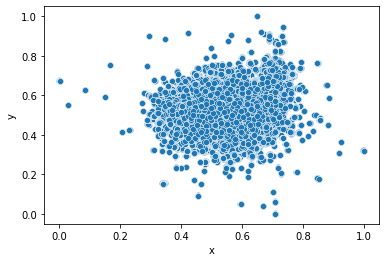

In [5]:
sns.scatterplot(
    data=normalized_df,
    x='x', y='y'
)

# Add an ID field

In [6]:
normalized_df['song_id'] = normalized_df.song + normalized_df.performer
normalized_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,0.664667,0.440681,0.255
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,0.633874,0.289964,0.255
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,0.699413,0.520891,0.255
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,0.659418,0.386992,0.255
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,0.473129,0.503386,0.255
...,...,...,...,...,...,...,...,...,...
166861,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,0.401392,0.516186,0.979
166862,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,0.466959,0.545186,0.979
166863,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,0.440482,0.502747,0.979
166864,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,0.567228,0.502491,0.979


# Add "categorical bands" for genre

In [7]:
genres_sorted_by_count = normalized_df.generic_genre.value_counts().index
genres_sorted_by_count

Index(['POP', 'ROCK', 'HIP_HOP', 'JAZZ_INFLUENCED', 'UNCATEGORIZED', 'ELECTRO',
       'COUNTRY', 'FUNK', 'LATIN', 'FOLK', 'REGGAE'],
      dtype='object')

In [8]:
normalized_df['genre_position_band'] = normalize_zero_to_one(
    normalized_df.generic_genre.replace(
        genres_sorted_by_count, # so it's SORTED BY MOST POPULAR
        range(0, len(genres_sorted_by_count))
    ).fillna(0).astype(int) # to be safe
)
normalized_df

,song_id,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,0.664667,0.440681,0.255,0.1
1,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,0.633874,0.289964,0.255,0.1
2,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,0.699413,0.520891,0.255,0.1
3,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,0.659418,0.386992,0.255,0.1
4,#9 DreamJohn Lennon,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,0.473129,0.503386,0.255,0.1
...,...,...,...,...,...,...,...,...,...,...
166861,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,0.401392,0.516186,0.979,0.2
166862,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,0.466959,0.545186,0.979,0.2
166863,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,0.440482,0.502747,0.979,0.2
166864,pride.is.the.devilJ. Cole & Lil Baby,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,0.567228,0.502491,0.979,0.2


<AxesSubplot:>

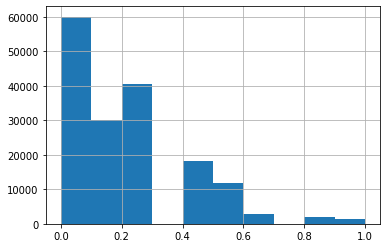

In [9]:
normalized_df.genre_position_band.hist()

# Export!

In [10]:
normalized_df.to_csv('./data/6-OUTPUT-lyric-lines-quadfeather-ready.csv', index=False)